In [1]:
import warnings
warnings.filterwarnings('ignore')
from summarizer import Summarizer #pretrained model to extract important sentences
import spacy # with pretrained model to recognize entities
import pandas
import os
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
import numpy as np
from matplotlib import pyplot as plt
package_dir = os.path.dirname(os.path.realpath('__file__'))
thefile = os.path.join(package_dir, '../data/summary_ents.csv')

I0221 16:26:30.375946 4624496064 file_utils.py:35] PyTorch version 1.3.0 available.
I0221 16:26:33.324955 4624496064 __init__.py:23] Loading model from /Users/shanzhu/.neuralcoref_cache/neuralcoref


In [2]:
df=pandas.read_csv(thefile)
df=df.drop(1926) #this row with wrong datetime structure

In [3]:
import re
def remove_unrelated(string):
    """
    further clean and remove unrelated content
    """
    unr=['To learn more','For more information','Contact:','Original press','Further information']
    for i in unr:
        idx=string.find(i)
        if idx!=-1:
            string=string[:idx]
    #string=re.sub('\W+',' ',string) 
    string=re.sub(r'www.\S+', '',string)#remove url
    string=re.sub(r'[\w\.-]+@[\w\.-]+','', string)#remove email
    p=re.compile(r'<.*?>')  #remove html tages                                              
    return string

In [4]:
df.summary.iloc[35]

'CMCIA Changes Name to Cannabis Canada Association – Evolution to Prepare for Both Medical and Consumer Cannabis Markets   OTTAWA, May 18, 2016 /CNW Telbec/ – The Canadian Medical Cannabis Industry Association (CMCIA) is pleased to announce that its member Licensed Producers have voted to change the Association’s name to Cannabis Canada Association (Cannabis Canada). The members of the Association met in January 2016 and developed a strategic plan for the next five years. Membership to be expanded beyond Licensed Producers Association membership will also be opened to embrace a wider range of stakeholders. The Association serves as a trusted resource on issues related to the safe and responsible use of cannabis for medical and non-medical purposes.'

In [5]:
df['content']=df['content'].apply(lambda x: remove_unrelated(x))

In [6]:
df['summary']=df['summary'].apply(lambda x: remove_unrelated(str(x)))

In [7]:
df['title']=df['title'].apply(lambda x: remove_unrelated(str(x)))

In [8]:
nlp=spacy.load("en_core_web_lg")

In [10]:
df['ents']=df['summary'].apply(lambda x: nlp(str(x)).ents)
df['ORG']=df.ents.apply(lambda x: [i.text for i in x if i.label_ =='ORG'])
orgs=['Tweed','Aurora','GW','Canopy Growth','Aphria','FDA','Health Canada','Shoppers Drug Mart']
for org in orgs:
        df[org] = df['ORG'].apply(lambda x: 1 if org in '. '.join(i for i in x) else 0)
df['GPE'] = df.ents.apply(lambda x: [i.text for i in x if i.label_ == 'GPE'])
df['Ca'] = df['GPE'].apply(lambda x: 1 if 'Canada' in x or 'Ontario' in x or 'Alberta' in x or 'British Columbia' in x else 0)

In [11]:
df.summary.iloc[35]

'CMCIA Changes Name to Cannabis Canada Association – Evolution to Prepare for Both Medical and Consumer Cannabis Markets   OTTAWA, May 18, 2016 /CNW Telbec/ – The Canadian Medical Cannabis Industry Association (CMCIA) is pleased to announce that its member Licensed Producers have voted to change the Association’s name to Cannabis Canada Association (Cannabis Canada). The members of the Association met in January 2016 and developed a strategic plan for the next five years. Membership to be expanded beyond Licensed Producers Association membership will also be opened to embrace a wider range of stakeholders. The Association serves as a trusted resource on issues related to the safe and responsible use of cannabis for medical and non-medical purposes.'

In [12]:
df.content.iloc[55]

' Foria, the sexual health and wellness cannabis company, will launch a novel cannabis product tomorrow, June 1st.  Foria Explore, an anal suppository that contains 60mg of THC and 10mg of CBD in a base of jojoba extract and organic sunflower lecithin, is designed for pelvic relaxation, diminished discomfort, heightened pleasure, release of tension and deeper penetration, according to the company’s website. Foria Explore is available only in California initially and is priced at $64 for a package of 8 suppositories, with an initial shipping date of June 6th. CEO Mathew Gerson first discussed the company’s third product at the recent Green Flower Media Cannabis Entrepreneur Summit, where he described building the Foria brand in a panel discussion. Foria’s first product, Foria Pleasure, is a spray lubricant designed to intensify the female orgasm. Earlier this year, the company launched Foria Relief, a vaginal suppository intended to mitigate the symptoms associated with menstruation. Fo

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def cloudW(df,file,column):
    text=df[column].str.cat(sep='. ')
    stopwords=set(STOPWORDS)
    stopwords.update(['cannabis','marijuana','will','company','release','press'])
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    #wordcloud.to_file(file)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig(file, dpi=300, bbox_inches='tight')
    plt.close()

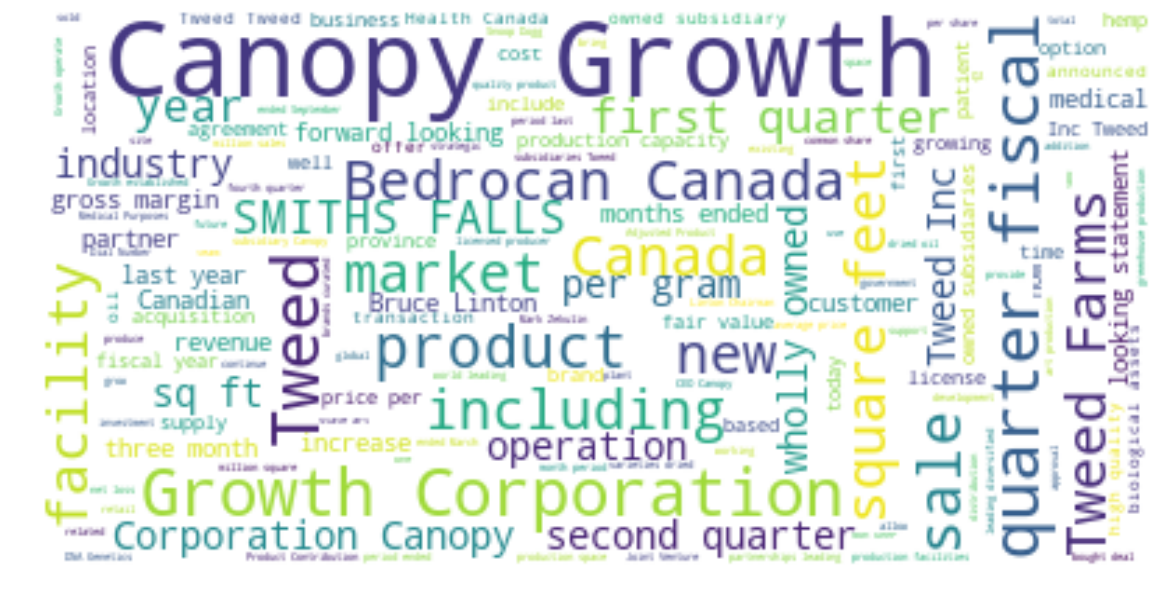

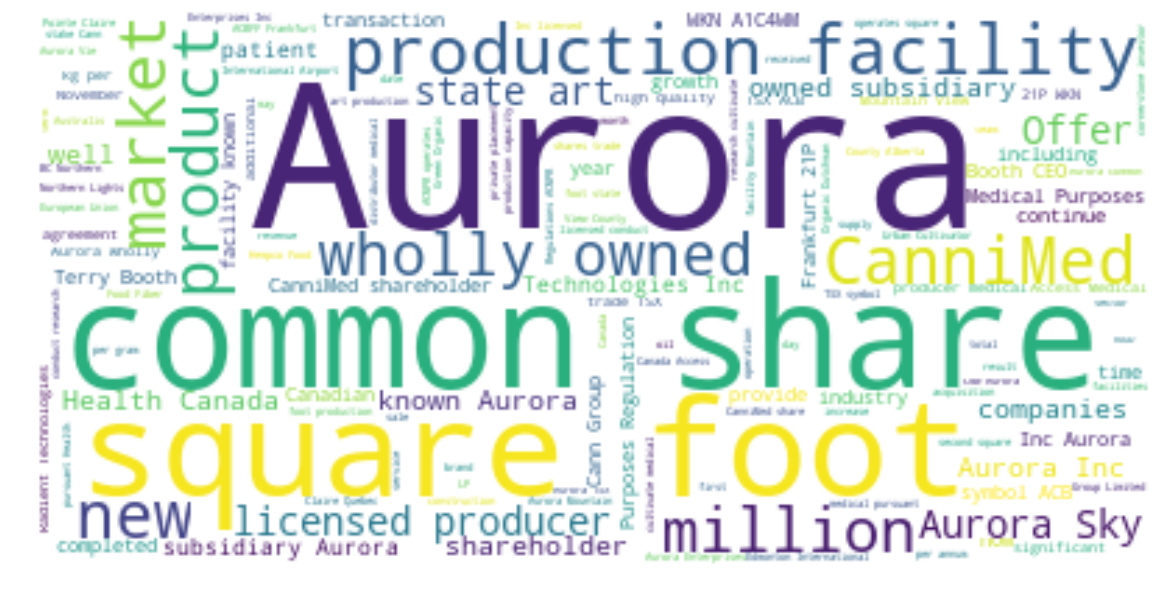

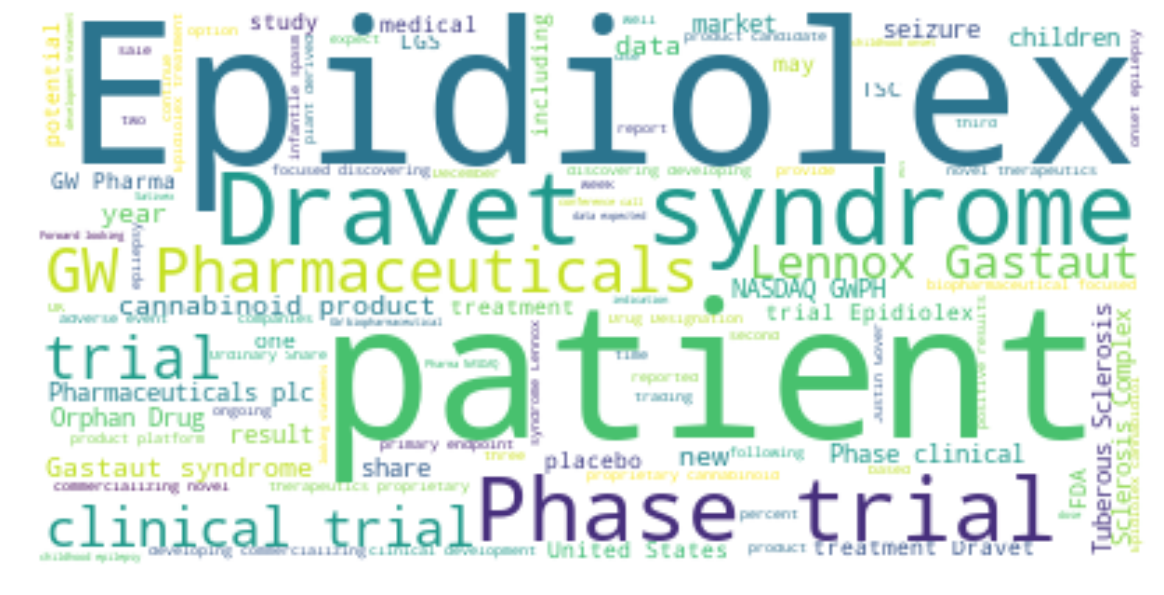

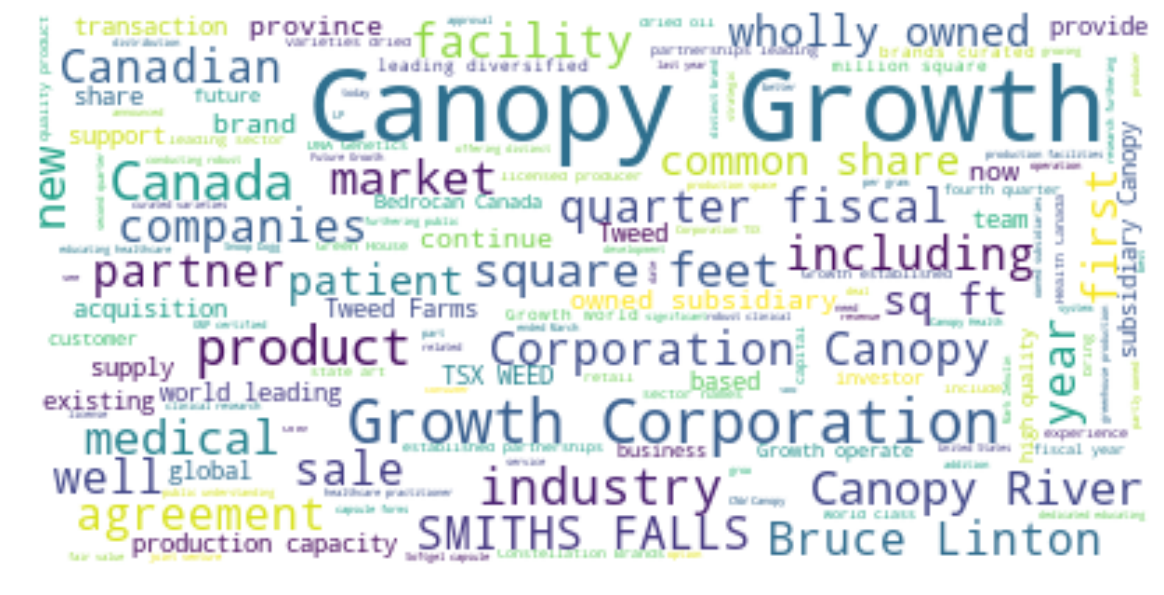

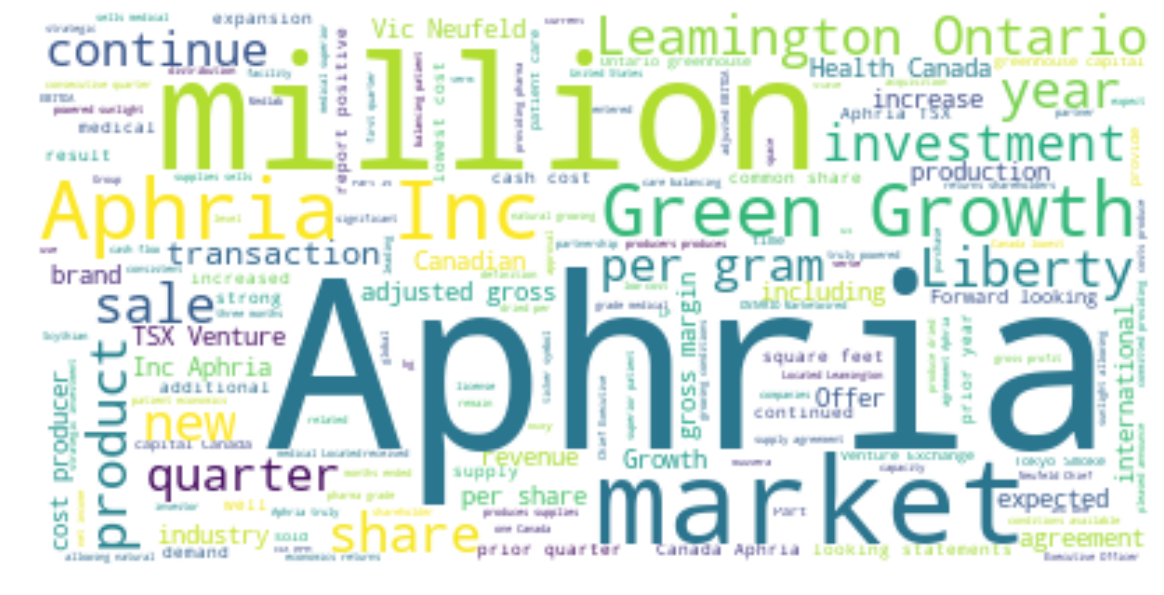

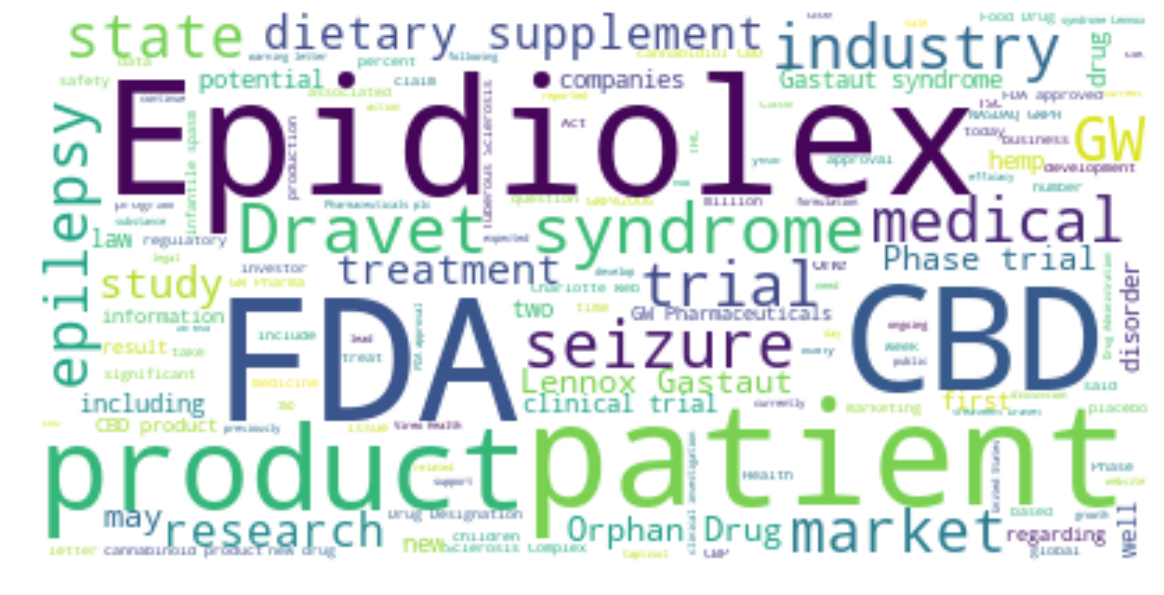

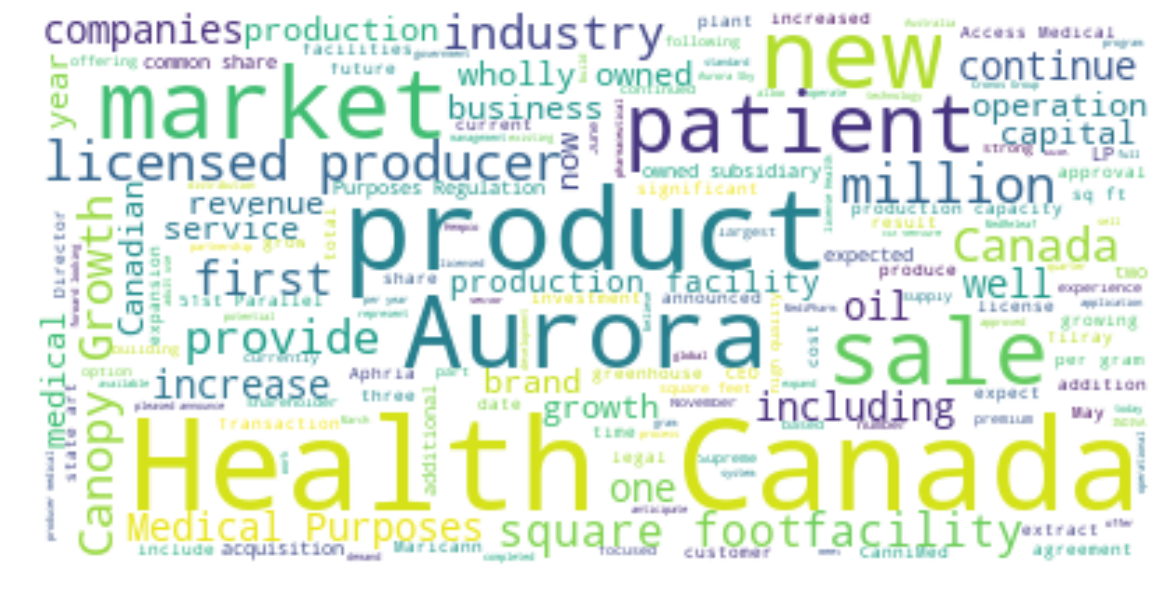

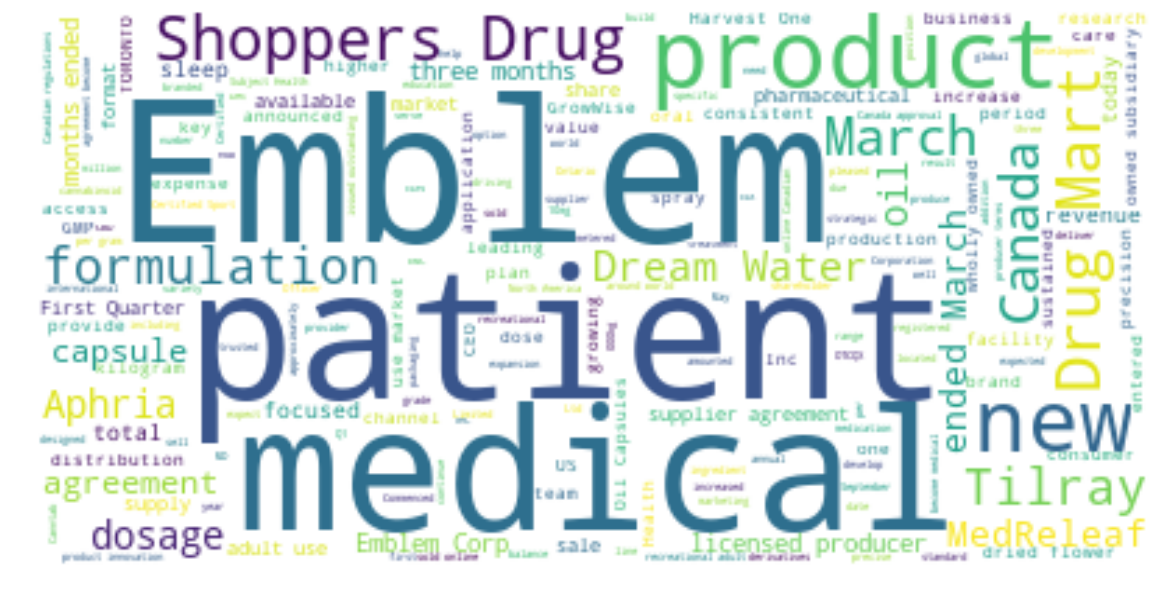

In [14]:
orgs=['Tweed','Aurora', 'GW', 'Canopy Growth','Aphria','FDA','Health Canada','Shoppers Drug Mart']
for org in orgs:
    cloudW(df[df[org]==1],package_dir+'/imgs/'+org+'.png','content')

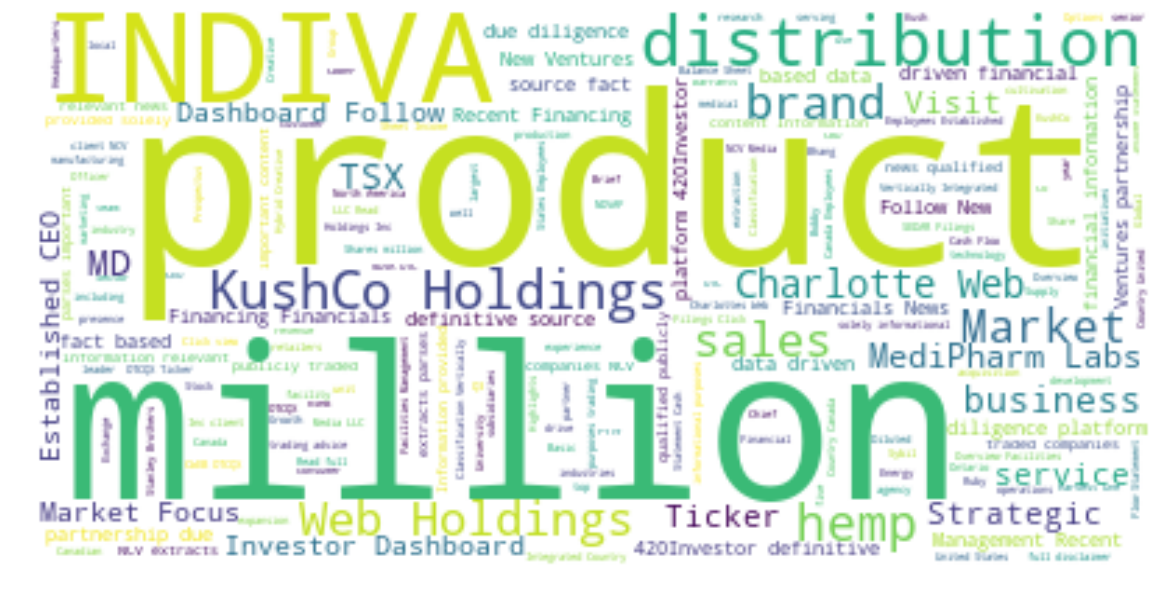

In [15]:
cloudW(df[(df['date'] > '2019-1-1 01:00:00') & (df['date'] <= '2020-1-1 04:00:00')],package_dir+'/imgs/'+'161'+'.png','content')

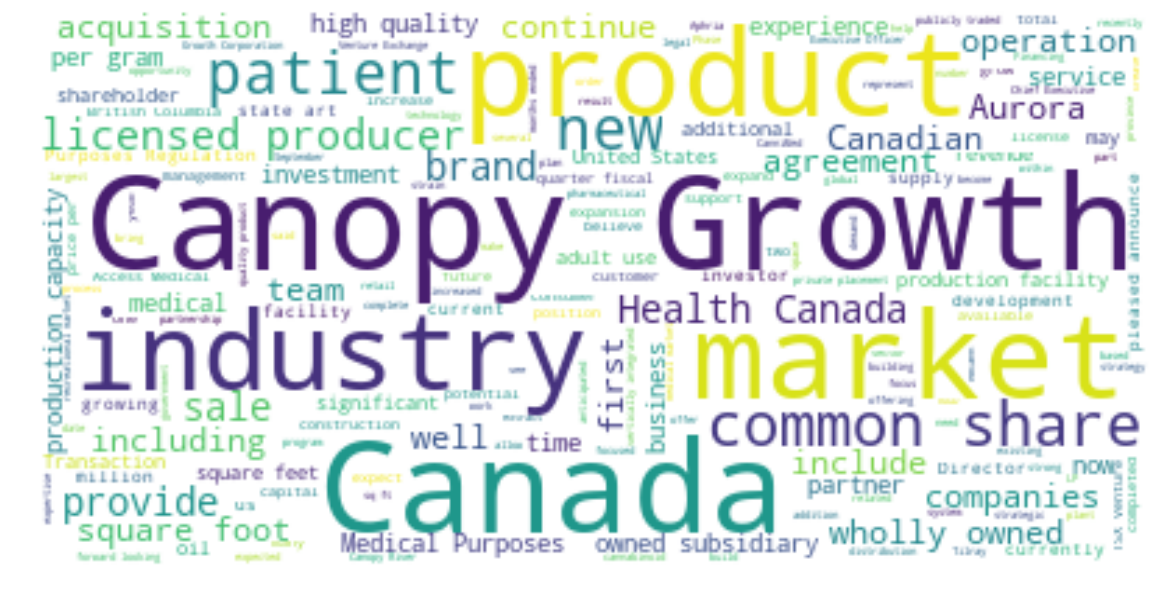

In [16]:
cloudW(df[df['Ca']==1],package_dir+'/imgs/'+'canada'+'.png','content')